# Mini-projet : classification de tumeurs à partir de données d'expression de gènes

Dans ce jeu de données, chaque observation est une tumeur, décrite par l'expression de 3 000 gènes. L'expression d'un gène est une mesure de la quantité d'ARN correspondant à ce gène qui est présente dans la cellule. Schématiquement, l'ADN est transcrit en ARN, lequel est lui-même traduit en une protéine. Les protéines assurent une multitude de fonctions du vivant, mais mesurer leur quantité est difficile ; d'où l'intérêt d'utiliser les quantités d'ARN, bien que la correspondance ne soit pas immédiate. 

Chaque tumeur de notre jeu de données est étiquetée selon qu'il s'agit d'une tumeur du sein ou d'une tumeur de l'ovaire. 

Le but de ce projet est de construire un classifieur binaire qui détermine, sur la base de l'expression de ces 3 000 gènes, si une tumeur est une tumeur du sein ou de l'ovaire.

## Instructions
1. Séparez les données en un jeu d'entraînement (90% des données) et un jeu de test.
2. Standardisez les données sur le jeu d'entraînement en utilisant `StandardScaler()` du [module preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. Utilisez une validation croisée pour sélectionner les meilleurs hyperparamètres d'au moins deux algorithmes d'apprentissage et comparer leurs performances. Attention à choisir une mesure de performance appropriée.
4. En conclure un modèle final et évaluer ses performances sur le jeu de test.

N'oubliez pas de commenter et interpréter vos résultats.

## Chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bvo_df = pd.read_csv('small_Breast_Ovary.csv')

The first column ("ID_REF") contains the sample ID, the last one ("Tissue") the "Breast" or "Ovary" label, and all others are gene expressions.

### Transformation des données en array numpy

In [3]:
# design matrix
X = np.array(bvo_df.drop(columns=["ID_REF", "Tissue"]))

In [4]:
X.shape

(542, 3000)

We have 542 samples, each represented by 3000 gene expressions.

In [5]:
bvo_df.head()

,ID_REF,212891_s_at,1565149_at,231148_at,241564_at,206135_at,225186_at,228366_at,204447_at,224369_s_at,...,244675_at,221893_s_at,208053_at,244232_at,205390_s_at,1555617_x_at,1562030_at,1555677_s_at,209087_x_at,Tissue
0,138027,587.6,221.8,18.5,117.5,154.2,369.7,277.2,702.9,1216.9,...,17.1,551.7,21.5,169.0,117.8,279.2,111.6,8.3,1288.1,Breast
1,179861,816.3,161.2,23.4,2.2,139.9,237.6,84.8,249.3,1708.3,...,15.4,539.5,62.1,80.3,7.7,172.0,19.6,6.4,695.1,Breast
2,38092,516.7,183.4,16.6,27.7,293.2,769.7,88.1,206.7,1995.2,...,6.7,520.1,4.7,5.2,8.0,62.3,67.0,47.8,1019.0,Breast
3,89022,364.0,206.1,206.4,1.9,228.8,307.5,216.1,531.2,1092.9,...,73.9,498.5,11.8,61.7,35.3,133.9,201.0,53.3,4226.6,Breast
4,138035,927.9,175.4,407.8,5.7,151.4,548.6,537.6,127.2,478.9,...,40.7,590.1,16.8,21.0,19.5,476.0,323.6,19.4,928.7,Breast


In [6]:
n_features = X.shape[1]

In [7]:
# target array
y = np.array(bvo_df["Tissue"])

# convert "Breast" in 0 and the other labels (here, "Ovarian") into 1
y = np.where(y=='Breast', 0, 1)

In [8]:
y.shape

(542,)

## Partie I: Preparation des données

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)

On sépare notre jeu de données entre un échantillon train et un échantillon test en réservant 20%
des données à ce dernier.

In [10]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

On normalise nos données par rapport à la moyenne et la variance de l'échantillon de train car les algorithmes apprennent mieux sur ce type de données

## Partie II: Support Vector Machine

In [11]:
from sklearn.svm import SVC
#SVC est le modèle SVM permettant la classification

acc_train, acc_test = list(), list()
C_range = np.linspace(0.01, 2, 20)
for param in C_range:
    clf = SVC(kernel='rbf', C=param, gamma=0.015)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))
    


On choisit un modèle RBF car on ne connait pas la forme de la séparation dans nos données.
On entraine un premier classifieur SVM sur le jeu de données et on test plusieurs valeurs de C qui mesurent le niveau de régularisation (petites valeurs de C pour beaucoup régulariser).

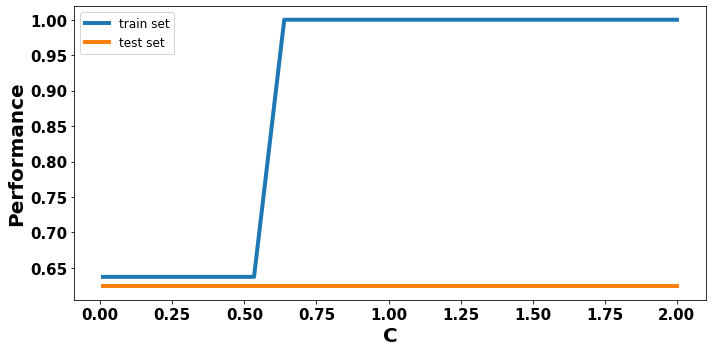

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(C_range, acc_train, label='train set', lw=4)
plt.plot(C_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("C", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

J'ai un overfitting très rapide et ce, quelque soit la valeur de C. Le data-set compte trop de features par rapport au nombre d'observations. Il faut maintenant que je réussise à selectionner les features pertinentes pour faire augmenter mon score. Je vais essayer la régression logistique qui effectue naturellement une selection de variables.

## Partie III : Regression logistique

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore", category=FutureWarning)

params= { 'C':[ 0.015,0.3, 0.2]}

# j'essaie des valeurs de C très faible pour régulariser un maximum

lr =LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)

# On découpe notre échantillon en 3 pour la cross-validation (je pense qu'on peut difficilement faire plus car
# nous ne possédons que 542 observations)

gs = GridSearchCV(estimator=lr, 
                   param_grid=params,
                   cv=3)

gs.fit(X_train_scaled, y_train)

print(gs.best_params_)
print(gs.score(X_train_scaled, y_train))
print(gs.score(X_test_scaled, y_test))

{'C': 0.3}
1.0
0.9357798165137615


In [14]:
acc_train, acc_test = list(), list()
C_range = np.linspace(0.01, 1, 20)
for param in C_range:
    clf = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=param, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)
    
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))
    

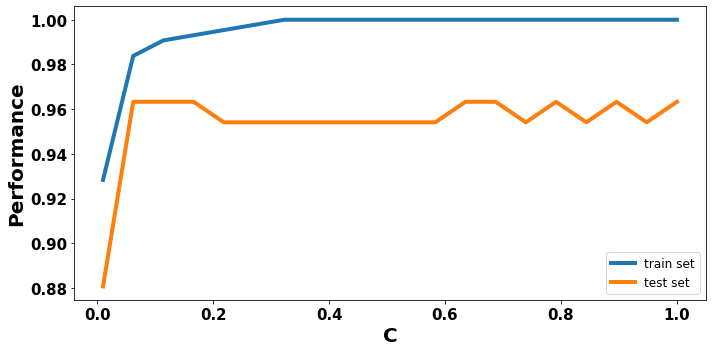

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(C_range, acc_train, label='train set', lw=4)
plt.plot(C_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("C", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()


On a effectivement un meilleur score mais toujours problème d'overfitting immédiat. Il faut réussir à choisir les features les plus importantes et réduire le nombre total de celles-ci.

## Partie IV : Selections de variables

On va chercher à construire un dataset ne contenant que les features importantes

In [16]:

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

clf = LassoCV()

sfm = SelectFromModel(clf, threshold=None, prefit=False, norm_order=1, max_features=300)
# Je m'impose un maximum de 300 features afin d'arriver à nb features < nb observations

sfm.fit(X,y)
X_transform = sfm.transform(X)
print(X_transform.shape)

(542, 41)


On obtient une base de données ne contenant plus que une quarantaine de features au lieu des 3000 de départ.
Nous allons tester les performances de la regression logistique sur ce nouveau dataset

(433, 41)


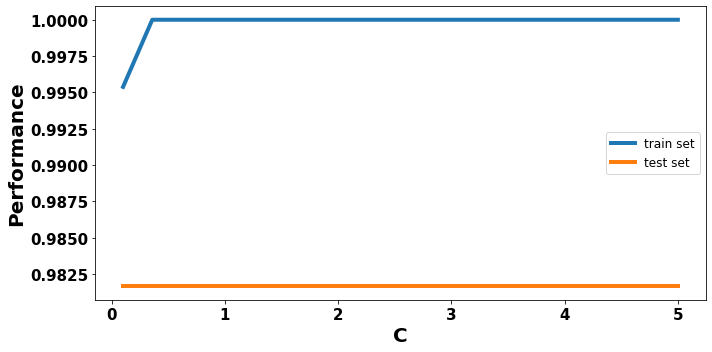

{'C': 0.5, 'penalty': 'l2', 'tol': 0.001}
1.0
0.981651376146789
0.996309963099631


In [17]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_transform, 
                                                    y, 
                                                    test_size=.2)

print(X_train_2.shape)

std_scale = StandardScaler().fit(X_train_2)
X_train_scaled_2 = std_scale.transform(X_train_2)
X_test_scaled_2 = std_scale.transform(X_test_2)
from sklearn.linear_model import LogisticRegression

acc_train, acc_test = list(), list()
C_range = np.linspace(0.1, 5, 20)
for param in C_range:
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=param, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)
    
    clf.fit(X_train_scaled_2, y_train_2)
    acc_train.append(clf.score(X_train_scaled_2, y_train_2))
    acc_test.append(clf.score(X_test_scaled_2, y_test_2))
    
plt.figure(figsize=(10, 5))

plt.plot(C_range, acc_train, label='train set', lw=4)
plt.plot(C_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("C", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()


params= { 'C':[0.5, 1, 1.5], 'penalty': ['l1','l2'],'tol': [0.001,0.0001,0.1] }

# j'essaie des valeurs de C très faible pour régulariser un maximum

lr =LogisticRegression( dual=False, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)

# On découpe notre échantillon en 3 pour la cross-validation (je pense qu'on peut difficilement faire plus car
# nous ne possédons que 542 observations)

gs = GridSearchCV(estimator=lr, 
                   param_grid=params,
                   cv=3)

gs.fit(X_train_scaled_2, y_train_2)

print(gs.best_params_)
print(gs.score(X_train_scaled_2, y_train_2))
print(gs.score(X_test_scaled_2, y_test_2))

X_transform_2 = std_scale.transform(X_transform)

print(gs.score(X_transform_2,y))


En ne gardant que les variables pertinentes dans mon modèle, le score de l'algorithme augmente de facon non négligeable.

## Partie V : Random Forest

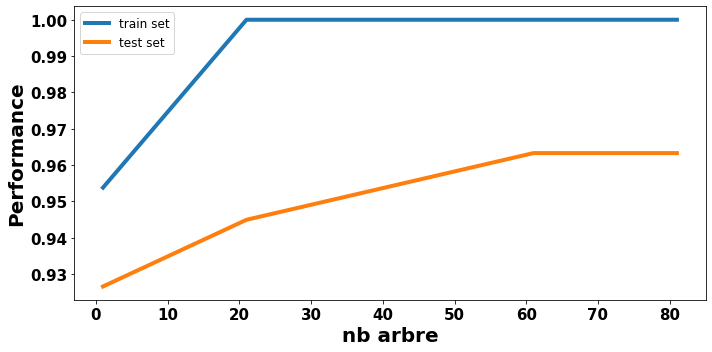

In [18]:
from sklearn.ensemble import RandomForestClassifier

acc_train, acc_test = list(), list()

n_range = np.arange(1,100,20)

for param in n_range:
    clf = RandomForestClassifier(n_estimators=param, criterion='gini', max_depth=10,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features='log2', 
                             max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=2, 
                             verbose=0, warm_start=False, class_weight=None)
    
    clf.fit(X_train_scaled_2, y_train_2)
    acc_train.append(clf.score(X_train_scaled_2, y_train_2))
    acc_test.append(clf.score(X_test_scaled_2, y_test_2))
    
    
plt.figure(figsize=(10, 5))
    
plt.plot(n_range, acc_train, label='train set', lw=4)
plt.plot(n_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("nb arbre", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

Je voulais déterminer le nombre pertinent d'arbres mais je me rends compte que ce n'est pas forcément une bonne technique. Je ne peux pas regarder le nombre d'arbres indépendamment des autres hyperparamètres

In [19]:
params = {'max_depth': [5,10,30,50],'criterion': ['gini','entropy'],
          'max_features' : [2,5,'log2','sqrt'], 'n_estimators': [100,200]}

rs = RandomForestClassifier(criterion='gini',
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=2, 
                             verbose=0, warm_start=False, class_weight=None)


gs_tree = GridSearchCV(estimator=rs, 
                   param_grid=params,
                   cv=3)

gs_tree.fit(X_train_scaled_2, y_train_2)

print(gs_tree.best_params_)
print(gs_tree.score(X_test_scaled_2, y_test_2))

{'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 200}
0.944954128440367


J'essaie d’augmenter la quantité de “weak classifier” en réduisant de beaucoup leur qualité. Je baisse le nombre de features associées à chaque arbre, le nombre de feuilles, la profondeur des arbres. Je cherche à augmenter "l'aléatoire" afin de rendre mon modèle plus robuste à l'overfitting.


## Partie VI: Boosting

On va maintenant tenter d'améliorer les performances de la regression logistique grâce à l'utilisation du boosting. 

In [23]:
from sklearn.ensemble import AdaBoostClassifier

weak_learner = LogisticRegression(penalty = 'l2', tol= 0.001, C=0.5)

clf = AdaBoostClassifier(weak_learner, n_estimators=50, learning_rate=0.001, 
                         random_state=3)

#je reprends les paramètres optimaux que j'avais déterminé précedemment

clf = clf.fit(X_train_2, y_train_2)

print("Weak_learner:", clf.base_estimator)
print("Weights of weak classifiers: ", clf.estimator_weights_)
    
print("n_estimators=", clf.n_estimators)
score = clf.score(X_test_2, y_test_2)
print("Acuracy (on test set) = ", score)


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test_2, clf.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

Weak_learner: LogisticRegression(C=0.5, tol=0.001)
Weights of weak classifiers:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
n_estimators= 50
Acuracy (on test set) =  0.981651376146789
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.97      0.97      0.97        38

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109


 CONFUSION MATRIX
[[70  1]
 [ 1 37]]


Vu le nombre réduit d'exemples, les différents classifieurs de mon adaboost sont très proches les uns des autres et ne sont donc pas utiles. Cet algorithme ne réduit pas les performances de mon classifieur linéaire mais il est incapable de les améliorer. La solution optimale reste de mettre un poids "1" sur le premier classifieur.

## Conclusion 

Au final, le meilleur classifieur reste la régression logistique avec laquelle j'obtiens le meilleur score sur le test set. La réduction du nombre de dimensions a permis un gain important de performance de mon modèle. Le boosting n'a pas permis d'améliorer mes performances à cause du nombre réduit d'observations disponibles. 

In [21]:
gs.score(X_test_scaled_2, y_test_2)

0.981651376146789